# Problema de física: Estudio del coeficiente de restitución en dos pelotas

Cuando un objeto rebota contra una superficie, se deforma al comprimirse y luego recupera su forma. Durante este proceso, es común que parte de la energía mecánica del objeto se pierda debido a la deformación. Esta pérdida de energía, que puede ser cuantificada por el coeficiente de restitución (e), define la disminución del rebote.

Para un objeto en caída libre que rebota de manera vertical, el tiempo que pasa en el aire entre dos rebotes sucesivos se puede modelar con la ecuación: 

tn = 2 * t0 * e^n 

donde:
- tn es el tiempo que transcurre entre el n-ésimo rebote y el (n+1)-ésimo
- t0 es el tiempo que transcurre entre el lanzamiento del objeto y el primer rebote
- e es el coeficiente de restitución
- n es el número de rebote (comenzando desde 0)

En este experimento, lanzamos dos pelotas y registramos los intervalos de tiempo entre cada rebote. Los datos recopilados se presentan en la siguiente tabla:

| Número de rebote | Pelota A (s) | Pelota B (s) |
| ---------------- | ------------ | ------------ |
| 1                | 0.45         | 0.51         |
| 2                | 0.41         | 0.43         |
| 3                | 0.37         | 0.39         |
| 4                | 0.33         | 0.32         |
| 5                | 0.30         | 0.28         |
| 6                | 0.27         | 0.24         |
| 7                | 0.24         | 0.20         |
| 8                | 0.21         | 0.17         |
| 9                | 0.19         | 0.14         |
| 10               | 0.16         | 0.11         |
| 11               | 0.14         | 0.08         |

## Objetivos
1. Identificar las variables dependiente e independiente del problema y justificar la elección.
2. Realizar un gráfico en Python del tiempo entre rebotes en función del número de rebote para cada pelota.
3. Aplicar una rectificación a los datos para lograr una relación lineal (sugerencia: utilizar el logaritmo natural de los tiempos entre rebotes).
4. Utilizar al menos dos métodos distintos (método de los mínimos cuadrados, método de los promedios) para obtener la mejor ecuación que se ajuste a los datos rectificados.
5. Analizar las ecuaciones y los gráficos obtenidos. ¿Qué pueden decirnos sobre el coeficiente de restitución de cada pelota?
6. Concluir sobre los resultados obtenidos, especialmente con respecto a la efectividad de cada método de ajuste y las características de cada pelota basadas en su coeficiente de restitución.



In [1]:
rebote = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
pelota_A = [0.45, 0.41, 0.37, 0.33, 0.30, 0.27, 0.24, 0.21, 0.19, 0.16, 0.14]
pelota_B = [0.51, 0.43, 0.39, 0.32, 0.28, 0.24, 0.20, 0.17, 0.14, 0.11, 0.08]


## Paso 1: Identificación de las variables dependiente e independiente

1. La variable independiente es el número de rebote, ya que es la variable que controlamos directamente.
2. La variable dependiente es el tiempo entre rebotes, ya que este cambia en respuesta al número de rebote.

## Paso 2: Creación de gráficos en Python
Usaremos Matplotlib para crear un gráfico de dispersión del tiempo en función del número de rebote.

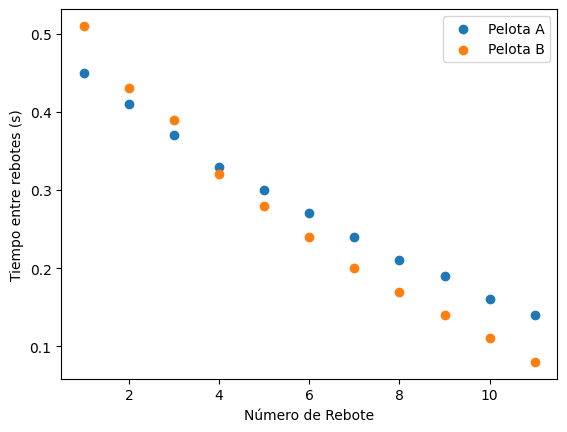

In [2]:
import matplotlib.pyplot as plt

plt.scatter(rebote, pelota_A, label='Pelota A')
plt.scatter(rebote, pelota_B, label='Pelota B')
plt.xlabel('Número de Rebote')
plt.ylabel('Tiempo entre rebotes (s)')
plt.legend()
plt.show()


## Paso 3: Rectificaciones aplicadas.

Rectificar significa hacer que los datos sean más fáciles de trabajar, en este caso, tomar el logaritmo natural de los tiempos entre rebotes. Esto simplificará el ajuste de la curva a los datos.

In [6]:
import numpy as np

log_pelota_A = np.log(pelota_A)
log_pelota_B = np.log(pelota_B)

print(log_pelota_A)
print(log_pelota_B)	

[-0.7985077  -0.89159812 -0.99425227 -1.10866262 -1.2039728  -1.30933332
 -1.42711636 -1.56064775 -1.66073121 -1.83258146 -1.96611286]
[-0.67334455 -0.84397007 -0.94160854 -1.13943428 -1.27296568 -1.42711636
 -1.60943791 -1.77195684 -1.96611286 -2.20727491 -2.52572864]


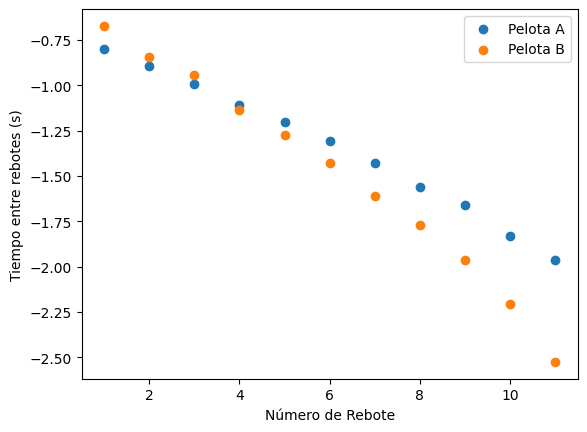

In [8]:
import matplotlib.pyplot as plt

plt.scatter(rebote, log_pelota_A, label='Pelota A')
plt.scatter(rebote, log_pelota_B, label='Pelota B')
plt.xlabel('Número de Rebote')
plt.ylabel('Tiempo entre rebotes (s)')
plt.legend()
plt.show()

## Paso 4: Ajuste de la curva mediante el método de los mínimos cuadrados

Vamos a ajustar una curva a los datos rectificados utilizando la función curve_fit de Scipy.

Ademas, imprimiremos las incertidumbres (Error asociado)


In [16]:
from scipy.optimize import curve_fit
import numpy as np

def func_exp(x, a, b):
    return a * np.exp(-b * x)

params_A, cov_A = curve_fit(func_exp, rebote, pelota_A)
params_B, cov_B = curve_fit(func_exp, rebote, pelota_B)

# Extraer las incertidumbres en los parámetros ajustados
std_devs_A = np.sqrt(np.diag(cov_A))
std_devs_B = np.sqrt(np.diag(cov_B))

print("Parámetros ajustados para la Pelota A: ", params_A)
print("Incertidumbres en los parámetros para la Pelota A: ", std_devs_A)

print("Parámetros ajustados para la Pelota B: ", params_B)
print("Incertidumbres en los parámetros para la Pelota B: ", std_devs_B)

Parámetros ajustados para la Pelota A:  [0.51195627 0.11110285]
Incertidumbres en los parámetros para la Pelota A:  [0.00599511 0.00242258]
Parámetros ajustados para la Pelota B:  [0.60808413 0.16162848]
Incertidumbres en los parámetros para la Pelota B:  [0.01241976 0.00499858]


## Preguntas y respuestas

1. **¿Por qué se toma la raíz cuadrada de la diagonal de la matriz `cov_A / cov_B`?**

   La matriz de covarianza devuelve la varianza de los parámetros (el cuadrado de la desviación estándar). La raíz cuadrada de la varianza te da la desviación estándar, que es una medida más intuitiva de la dispersión de los datos.

2. **¿Qué son las incertidumbres?**

   Las incertidumbres son una medida del grado de error o variabilidad que puedes esperar en una medición. En este caso, `std_devs` (la desviación estándar de los parámetros) es una medida de cuánto podrían variar tus estimaciones de los parámetros debido a errores en tus datos de entrada.

3. **¿Cómo se utilizan estas incertidumbres?**

   Estas incertidumbres podrían ser utilizadas para calcular intervalos de confianza alrededor de tus estimaciones de parámetros. Un intervalo de confianza es un rango dentro del cual puedes estar "seguro" de que se encuentra el valor real, dado el nivel de error en tus datos.

   Por ejemplo, si tu estimación del parámetro `a` es 0.5, y tu desviación estándar de `a` es 0.1, podrías decir que tienes un 95% de confianza de que el verdadero valor de `a` se encuentra dentro del intervalo `(0.5 - 2*0.1, 0.5 + 2*0.1) = (0.3, 0.7)`, asumiendo que tus errores están distribuidos normalmente.

   Esto te proporciona una medida de cuán confiable es tu estimación de los parámetros. Si las incertidumbres son grandes, podría indicar que tus datos son ruidosos y tus estimaciones podrían ser imprecisas.


## Paso 5: Ajuste de la curva mediante el método de los promedios

Vamos a ajustar una línea a los datos rectificados utilizando la función LinearRegression de Scikit-learn.

In [15]:
from sklearn.linear_model import LinearRegression

reg_A = LinearRegression().fit(np.array(rebote).reshape(-1, 1), log_pelota_A)
reg_B = LinearRegression().fit(np.array(rebote).reshape(-1, 1), log_pelota_B)

print(reg_A.coef_)
print(reg_B.coef_)

[-0.11571373]
[-0.17627427]


## Paso 6: Interpretación de los resultados

Los coeficientes obtenidos de cada ajuste representan diferentes cosas dependiendo del método utilizado. 

1. **Método de mínimos cuadrados:** Los coeficientes `a` y `b` obtenidos de la función `func_exp` a través de `curve_fit` representan parámetros específicos del modelo exponencial. En este contexto, `a` representa el valor inicial (tiempo del primer rebote) y `b` es la tasa de decaimiento (relacionada con el coeficiente de restitución).

2. **Método de los promedios:** El coeficiente obtenido del ajuste lineal (`reg.coef_`) es la pendiente de la línea ajustada en el espacio rectificado. En nuestro caso, representa la tasa de decaimiento, es decir, el coeficiente de restitución, en la escala logarítmica.

Estos coeficientes son útiles porque nos proporcionan información cuantitativa sobre el comportamiento del sistema que estamos estudiando (en este caso, el rebote de la pelota).



## Paso 7: Conclusión

El coeficiente de restitución es una medida de la "elasticidad" de los rebotes de la pelota, o cuánta energía conserva la pelota después de cada rebote. Un coeficiente de restitución más alto significa que la pelota conserva más de su energía después de cada rebote, lo que resulta en rebotes más altos. Por otro lado, un coeficiente de restitución más bajo significa que la pelota pierde más energía en cada rebote, resultando en rebotes más bajos.

Los coeficientes calculados a partir de los dos métodos nos dan una estimación de este parámetro para cada pelota. A partir de estos resultados, podemos inferir sobre el material y las propiedades físicas de cada pelota. Es importante recordar que estas son estimaciones basadas en los datos que tenemos y los modelos que hemos utilizado para analizarlos, y siempre hay un grado de incertidumbre en cualquier estimación obtenida a partir de datos experimentales.

## Resumen

Hemos realizado un análisis detallado de la experimentación con dos pelotas. El análisis se ha basado en el modelo físico `tn = 2 * t0 * e^n`, donde `tn` es el tiempo de rebote, `t0` es el tiempo inicial y `n` es el número de rebote.

Nuestro objetivo ha sido determinar los parámetros que mejor se ajustan a este modelo a través de dos métodos: el método de los mínimos cuadrados y el método de regresión lineal sobre los datos rectificados.

La rectificación, esencialmente el paso de tomar el logaritmo de los datos, es importante para linearizar la relación, permitiendo el uso de técnicas de regresión lineal.

Los parámetros ajustados (`a` y `b` en el caso del método de mínimos cuadrados, y `coef_` en el caso de la regresión lineal) son específicos para cada conjunto de datos, en este caso para cada pelota.

Hemos calculado también las incertidumbres asociadas a estas estimaciones de los parámetros, para tener una idea de la confiabilidad de nuestras estimaciones. Estas incertidumbres pueden ser interpretadas como el grado de error o variabilidad que podemos esperar en las estimaciones.

Al final, hemos obtenido una representación matemática del comportamiento de cada pelota durante los rebotes. Esta representación se puede utilizar para hacer predicciones sobre futuros rebotes y para comparar el comportamiento de diferentes pelotas bajo las mismas condiciones.